## Import packages


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Read data

In [2]:
mydata=pd.read_csv(r"dataset_2000_Person_Gender_Height_Weight_Index.csv")
mydata

,Gender,Height in ft,Weight in kg,Index
0,Male,5.721846,80.778476,2
1,Male,6.065286,91.096331,2
2,Male,5.719413,84.158730,2
3,Male,5.743300,88.123328,3
4,Male,5.911665,90.559034,2
...,...,...,...,...
1995,Female,5.334471,55.253387,1
1996,Female,5.175008,49.599945,0
1997,Female,5.437808,67.826255,3
1998,Female,5.670012,73.428455,3


## Dataset information

In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
Gender          2000 non-null object
Height in ft    2000 non-null float64
Weight in kg    2000 non-null float64
Index           2000 non-null int64
dtypes: float64(2), int64(1), object(1)
memory usage: 62.6+ KB


In [4]:
mydata.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [5]:
mydata.isna().sum()

Gender          0
Height in ft    0
Weight in kg    0
Index           0
dtype: int64

In [6]:
mydata.shape

(2000, 4)

In [7]:
mydata.size

8000

In [8]:
mydata.dtypes

Gender           object
Height in ft    float64
Weight in kg    float64
Index             int64
dtype: object

In [9]:
mydata.describe()

,Height in ft,Weight in kg,Index
count,2000.000000,2000.000000,2000.000000
mean,5.528416,73.121172,2.213500
std,0.319701,14.553251,0.863302
min,4.611375,31.289987,0.000000
25%,5.290391,61.519709,2.000000
50%,5.524660,73.460812,2.000000
75%,5.753530,84.423807,3.000000
max,6.462266,115.307433,4.000000


## Handle categorical variables with numerically coded values

In [10]:
# dummy of dataset
dummy=mydata
dummy['Gender'].replace(['Male','Female'],[1,0],inplace=True)
dummy

,Gender,Height in ft,Weight in kg,Index
0,1,5.721846,80.778476,2
1,1,6.065286,91.096331,2
2,1,5.719413,84.158730,2
3,1,5.743300,88.123328,3
4,1,5.911665,90.559034,2
...,...,...,...,...
1995,0,5.334471,55.253387,1
1996,0,5.175008,49.599945,0
1997,0,5.437808,67.826255,3
1998,0,5.670012,73.428455,3


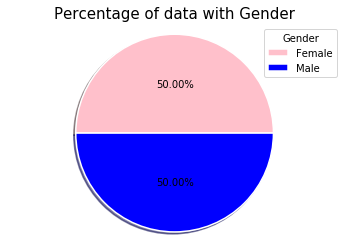

In [11]:
Gen=['Female','Male']
color=['pink','blue']
plt.pie(dummy.groupby('Gender').count()['Weight in kg'],
        colors=color,
        autopct='%1.2f%%',
        pctdistance=0.5,
        shadow=True,
        wedgeprops={"edgecolor":"1",'linewidth': 1.5,'linestyle': 'solid', 'antialiased': True}
       )
plt.axis('equal')  
plt.legend(Gen,title="Gender",loc='upper right')
plt.title('Percentage of data with Gender',color='black',size=15)
plt.show()

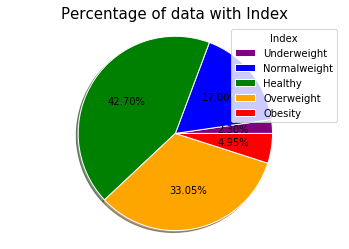

In [12]:
Index=['Underweight', 'Normalweight', 'Healthy', 'Overweight', 'Obesity']
color=['purple','blue','green','orange','red']

plt.pie(dummy.groupby('Index').count()['Weight in kg'],
        colors=color,
        autopct='%1.2f%%',
        pctdistance=0.6,
        shadow=True,
        wedgeprops={"edgecolor":"1",'linewidth': 1,'linestyle': 'solid', 'antialiased': True}
       )

plt.axis('equal')  
plt.legend(Index,title="Index",loc='upper right')
plt.title('Percentage of data with Index',color='black',size=15)
plt.show()

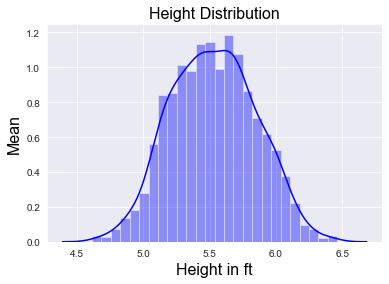

In [13]:
sns.set_style('darkgrid')  
sns.distplot(dummy['Height in ft'],color='b')
plt.title('Height Distribution',color='black',size=16)
plt.xlabel('Height in ft',color='black',size=16)
plt.ylabel('Mean',color='black',size=16)
plt.show()

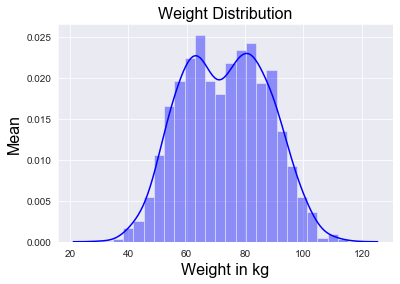

In [14]:
sns.set_style('darkgrid')  
sns.distplot(dummy['Weight in kg'],color='blue')
plt.title('Weight Distribution',color='black',size=16)
plt.xlabel('Weight in kg',color='black',size=16)
plt.ylabel('Mean',color='black',size=16)
plt.show()

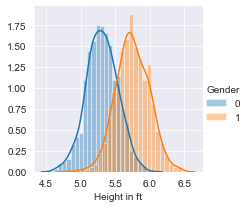

In [15]:
sns.FacetGrid(dummy,hue="Gender").map(sns.distplot,"Height in ft").add_legend()
plt.show()

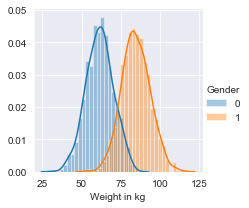

In [16]:
sns.FacetGrid(dummy,hue="Gender").map(sns.distplot,"Weight in kg").add_legend()
plt.show()

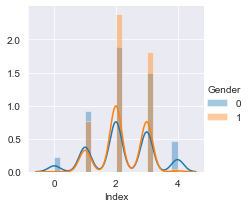

In [17]:
sns.FacetGrid(dummy,hue="Gender").map(sns.distplot,"Index").add_legend()
plt.show()

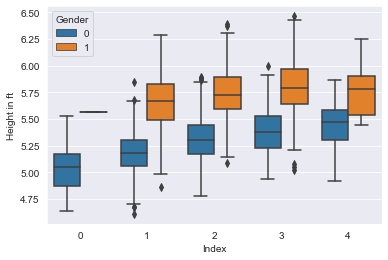

In [18]:
# for outliers
sns.boxplot(x='Index',y='Height in ft',hue='Gender',data=dummy)
plt.show()

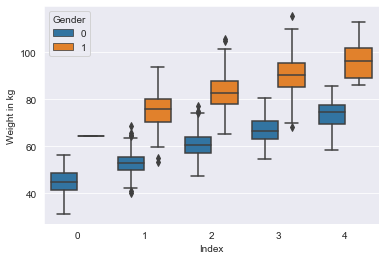

In [19]:
# for outliers
sns.boxplot(x='Index',y='Weight in kg',hue='Gender',data=dummy)
plt.show()

In [20]:
# correlation matrix
corrMatrix=dummy.corr()
corrMatrix

,Gender,Height in ft,Weight in kg,Index
Gender,1.000000,0.688990,0.793599,0.005214
Height in ft,0.688990,1.000000,0.926277,0.227543
Weight in kg,0.793599,0.926277,1.000000,0.432294
Index,0.005214,0.227543,0.432294,1.000000


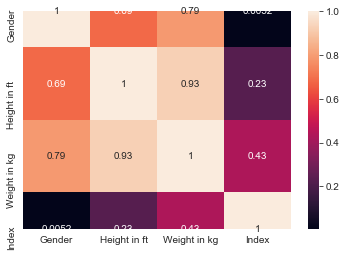

In [21]:
sns.heatmap(corrMatrix, annot=True)
plt.show()

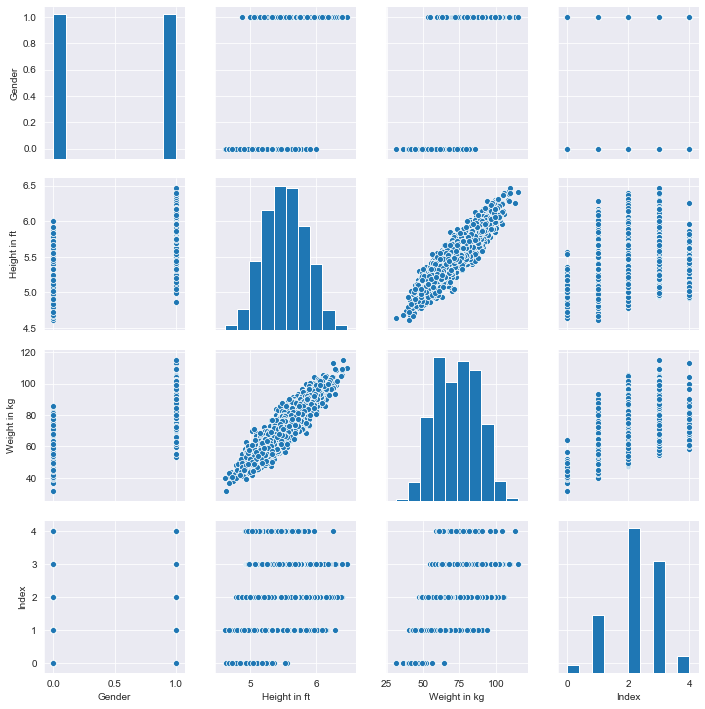

In [22]:
sns.pairplot(dummy)
plt.show()

# MACHINE LEARNING MODELS


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [24]:
#building models
modelList = []
modelList.append(('LR', LogisticRegression()))
modelList.append(('KNN', KNeighborsClassifier()))
modelList.append(('DT', DecisionTreeClassifier()))
modelList.append(('RFC', RandomForestClassifier()))

In [25]:
print(mydata.groupby('Index').size())
#mydata.Index[mydata.Index==3 or mydata.Index==4 or mydata.Index==5] = 1
#1.separating input from output
x_input=mydata.iloc[:,0:3]# type dataframe
y_out=mydata.iloc[:,3]#type- series(1D)
#2. encoding gender replacing male with 1 and female with 0
#this is known as binary encoding
x_input.Gender[x_input.Gender=="Male"]=1
x_input.Gender[x_input.Gender=="Female"]=0
print()


#transforming data
xx_input=x_input.values.reshape(2000,3)
yy_output=y_out.values.reshape(2000,1)

#now splitting the data to check the accuracy

#3.splitting into training and testing
x_train=xx_input[0:1600]
x_test=xx_input[1600:]
y_train=yy_output[0:1600]
y_test=yy_output[1600:]

names=[]
score=[]
for name, model in modelList:
    model.fit(x_train, y_train);
    Y_pred = model.predict(x_test)
    score.append(accuracy_score(y_test, Y_pred))
    names.append(name)
table = pd.DataFrame({'Name ': names, 'Score': score})

#training the model
teacher=KNeighborsClassifier()
Index_name=pd.Series(["Extremely Weak","Weak","Normal","Overweight","Obesity","Extreme Obesity"])

model=teacher.fit(x_train,y_train)
print(table)



print("\nBODY MASS INDEX PREDICTION OF HEALTH STATUS")
print("..................................................................")
print("..................................................................")
s=input("Enter your Gender (For Male, type 1 and for Female, type 0): ")
print("..................................................................")
h=input("Enter your Height (in ft): ")
print("..................................................................")
w=input("Enter your Weight (in kg): ")
print("..................................................................\n\n")

clfr = int(input("Which Classifier to use...\n \n1.LR \n2.KNN  \n3.DT  \n4.RFC \n\nEnter Choice:" ))
print("\n\n..................................................................")
print("..................................................................\n\n")
i=model.predict([[s,h,w]])

print("Your BMI range is: \n\n")
print(Index_name[i])


print("\nBMI Categories:\n\nExtremely weak = <16 \n\nWeak = 16-18.4 \n\nNormal = 18.5–24.9 \n\nOverweight = 25–29.9\n\nObesity = BMI of 30 or greater")

print("\n\n..................................................................")
print("..................................................................")
print("..................................................................")
print("..................................................................")

Index
0     46
1    340
2    854
3    661
4     99
dtype: int64



C:\Users\user\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Speci

  Name    Score
0    LR  0.6150
1   KNN  0.6950
2    DT  0.8200
3   RFC  0.8975

BODY MASS INDEX PREDICTION OF HEALTH STATUS
..................................................................
..................................................................
Enter your Gender (For Male, type 1 and for Female, type 0): 1
..................................................................
Enter your Height (in ft): 5.5
..................................................................
Enter your Weight (in kg): 60
..................................................................


Which Classifier to use...
 
1.LR 
2.KNN  
3.DT  
4.RFC 

Enter Choice:1


..................................................................
..................................................................


Your BMI range is: 


2    Normal
dtype: object

BMI Categories:

Extremely weak = <16 

Weak = 16-18.4 

Normal = 18.5–24.9 

Overweight = 25–29.9

Obesity = BMI of 30 or greater


.....................

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:532: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:532: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


In [4]:
from tkinter import *
from tkinter import messagebox


def get_height():
    
    height = float(ENTRY2.get())
    return height


def get_weight():
    
    weight = float(ENTRY1.get())
    return weight


In [5]:
def calculate_bmi(a=""):   # "a" is there because the bind function gives an argument to the function....
    print(a)
   
    try:
        height = get_height()
        weight = get_weight()
        height = height 
        bmi = weight / ((height*0.3048) ** 2)
        
    except ZeroDivisionError:
        messagebox.showinfo("Result", "Please enter positive height!!")
        
    except ValueError:
        messagebox.showinfo("Result", "Please enter valid data!")
        
    else:
        if bmi <= 15.0:
            res = "Your BMI is " + str(round(bmi,2)) + "\nRemarks: Very severely underweight"
            messagebox.showinfo("Result", res)
            
        elif 15.0 < bmi <= 16.0:
            res = "Your BMI is " + str(round(bmi,2)) + "\nRemarks: Severely underweight"
            messagebox.showinfo("Result", res)
        elif 16.0 < bmi < 18.5:
            res = "Your BMI is " + str(round(bmi,2)) + "\nRemarks: Underweight"
            messagebox.showinfo("Result", res)
        elif 18.5 <= bmi <= 25.0:
            res = "Your BMI is " + str(round(bmi,2)) + "\nRemarks: Normal"
            messagebox.showinfo("Result", res)
        elif 25.0 < bmi <= 30:
            res = "Your BMI is " + str(round(bmi,2)) + "\nRemarks: Overweight"
            messagebox.showinfo("Result", res)
        elif 30.0 < bmi <= 35.0:
            res = "Your BMI is " + str(round(bmi,2)) + "\nRemarks: Moderately obese"
            messagebox.showinfo("Result", res)
        elif 35.0 < bmi <= 40.0:
            res = "Your BMI is " + str(round(bmi,2)) + "\nRemarks: Severely obese"
            messagebox.showinfo("Result", res)
        else:
            res = "Your BMI is " + str(round(bmi,2)) + "\nRemarks: Super obese"
            messagebox.showinfo("Result", res)

In [6]:
if __name__ == '__main__':
    TOP = Tk()
    TOP.bind("<Return>", calculate_bmi)
    TOP.geometry("400x400")
    TOP.configure(background="#307678")
    TOP.title("BMI Calculator using Machine learning")
    TOP.resizable(width=False, height=False)
    
    LABLE = Label(TOP, bg="#307678", text="Welcome to BMI Calculator", font=("Helvetica", 15, "bold"), pady=10)
    LABLE.place(x=55, y=0)
    LABLE1 = Label(TOP, bg="#cef0f1", text="Enter Weight (in kg)", bd=6,
                   font=("Helvetica", 10, "bold"), pady=5)
    LABLE1.place(x=55, y=60)
    ENTRY1 = Entry(TOP, bd=8, width=6, font="Roboto 11")
    ENTRY1.place(x=240, y=60)
    
    LABLE2 = Label(TOP, bg="#cef0f1", text="Enter Height (in ft)", bd=6,
                   font=("Helvetica", 10, "bold"), pady=5)
    LABLE2.place(x=55, y=121)
    ENTRY2 = Entry(TOP, bd=8, width=6, font="Roboto 11")
    ENTRY2.place(x=240, y=121)
    
    LABLE3 = Label(TOP, bg="#307678", text="Created by: Mohd. Asim", font=("Helvetica", 15, "bold"), pady=10)
    LABLE3.place(x=80, y=350)
    
    BUTTON = Button(bg="#2187e7", bd=12, text="BMI", padx=33, pady=15, command=calculate_bmi,
                    font=("Helvetica", 20, "bold"))
    BUTTON.grid(row=3, column=0, sticky=W)
    BUTTON.place(x=115, y=220)
    TOP.mainloop()